# 2b. Сегментация

In [1]:
import numpy as np
from skimage import data
from skimage.feature import canny
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.color import label2rgb

In [2]:
coins = data.coins()
hist = np.histogram(coins, bins=np.arange(0, 256))

Text(0.5,1,'histogram of grey values')

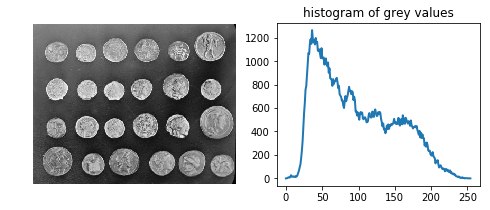

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('histogram of grey values')

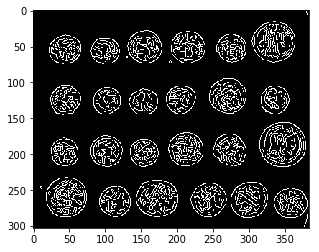

In [4]:
edges = canny(coins/255.)
plt.imshow(edges, cmap=plt.cm.gray)

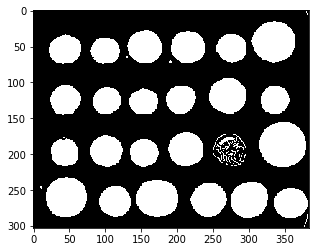

In [5]:
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins, cmap=plt.cm.gray)

In [6]:
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

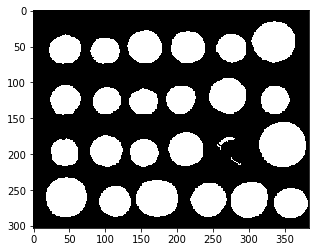

In [7]:
plt.imshow(coins_cleaned, cmap=plt.cm.gray)

In [8]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

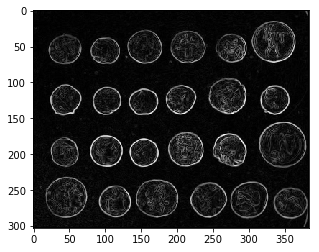

In [9]:
elevation_map = sobel(coins)
plt.imshow(elevation_map, cmap=plt.cm.gray)

In [10]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2

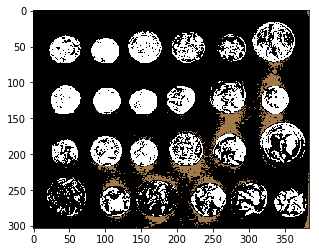

In [11]:
plt.imshow(markers, cmap=plt.cm.cubehelix)

In [12]:
segmentation = watershed(elevation_map, markers)

C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


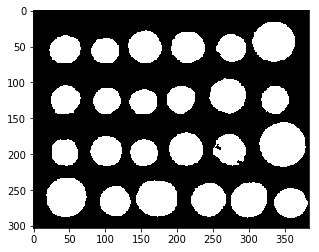

In [13]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [14]:
segmentation = ndi.binary_fill_holes(segmentation - 1)

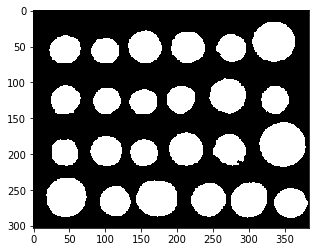

In [15]:
plt.imshow(segmentation, cmap=plt.cm.gray)

In [16]:
labeled_coins, _ = ndi.label(segmentation)

C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


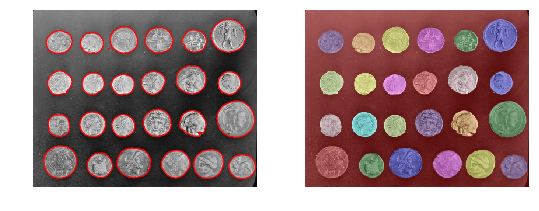

In [48]:
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='r')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')
    a.set_adjustable('box-forced')

plt.tight_layout()

# 2a. Сегментация

C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\data\_binary_blobs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask[[indices for indices in points]] = 1


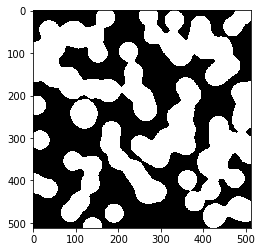

In [18]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

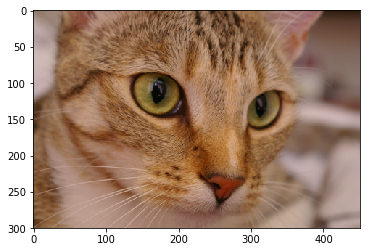

In [19]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
image = data.chelsea()
plt.imshow(image)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [21]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ea8dd4edd8>)

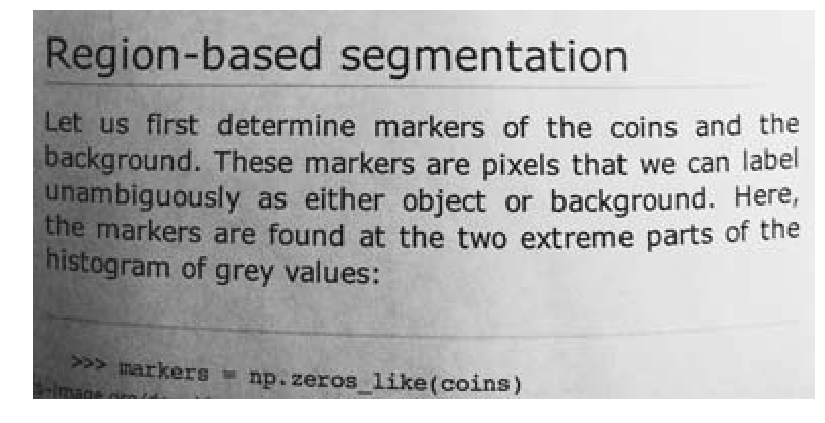

In [22]:
text = data.page()
image_show(text)

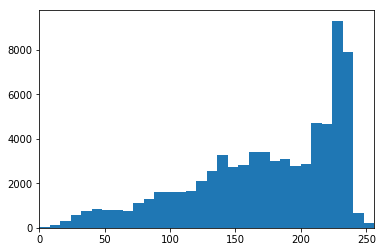

In [23]:
fig, ax = plt.subplots(1, 1)
ax.hist(text.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

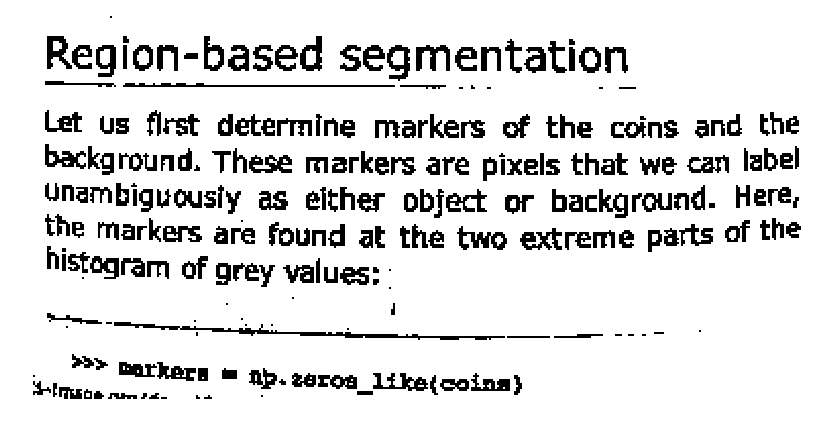

In [24]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

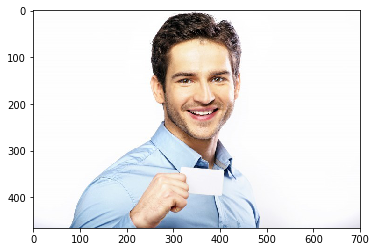

In [25]:
from skimage import io
image = io.imread('1.jpg') 
plt.imshow(image);

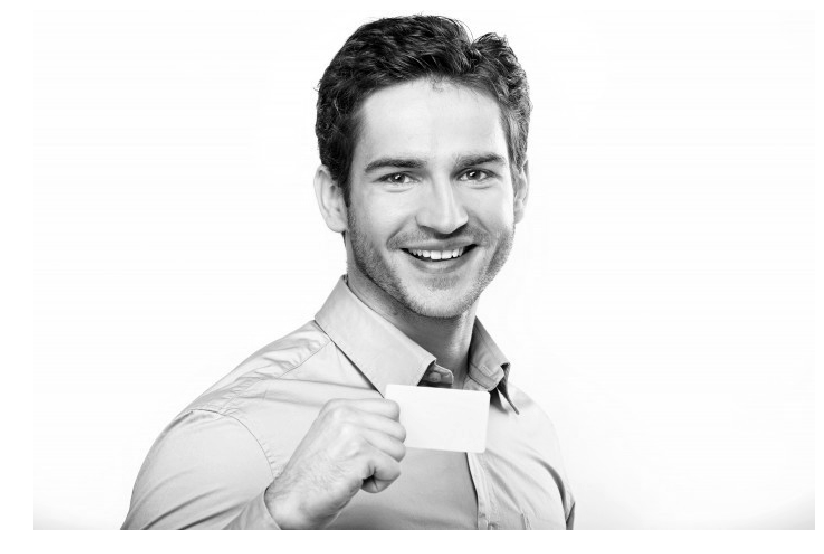

In [26]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [34]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(300, [150, 370], 150)[:-1]

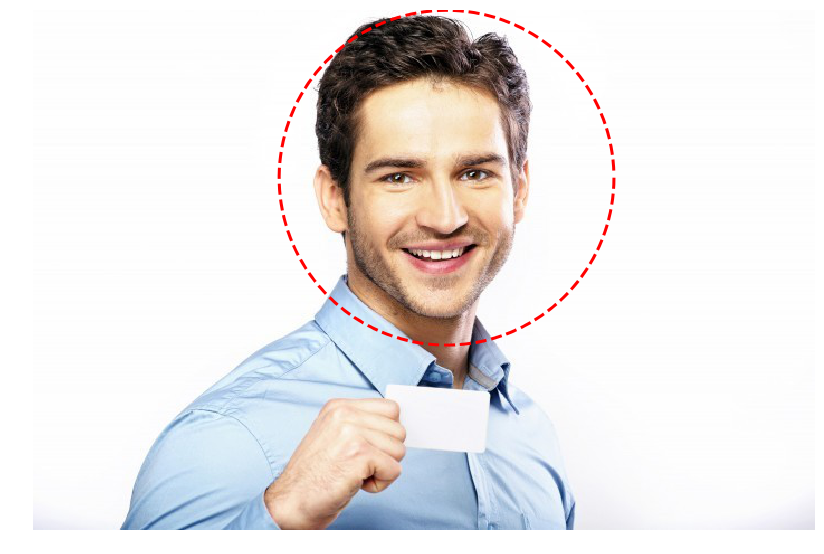

In [35]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

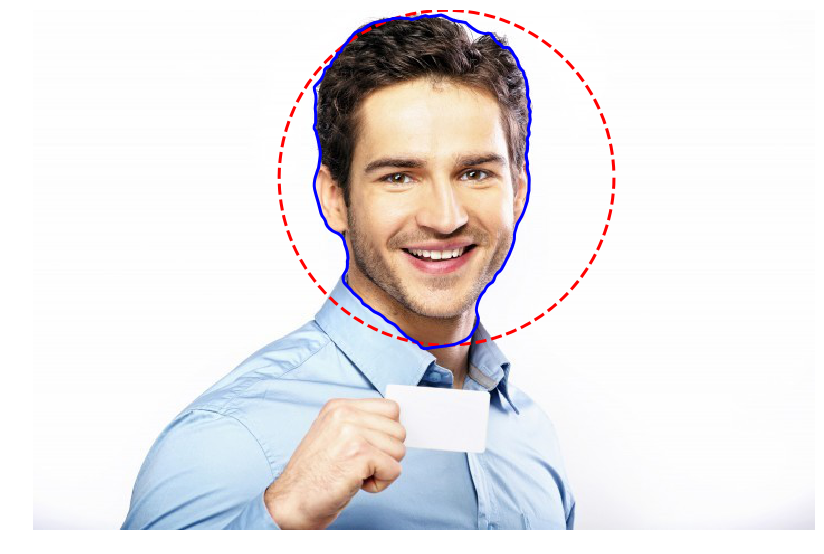

In [36]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [37]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

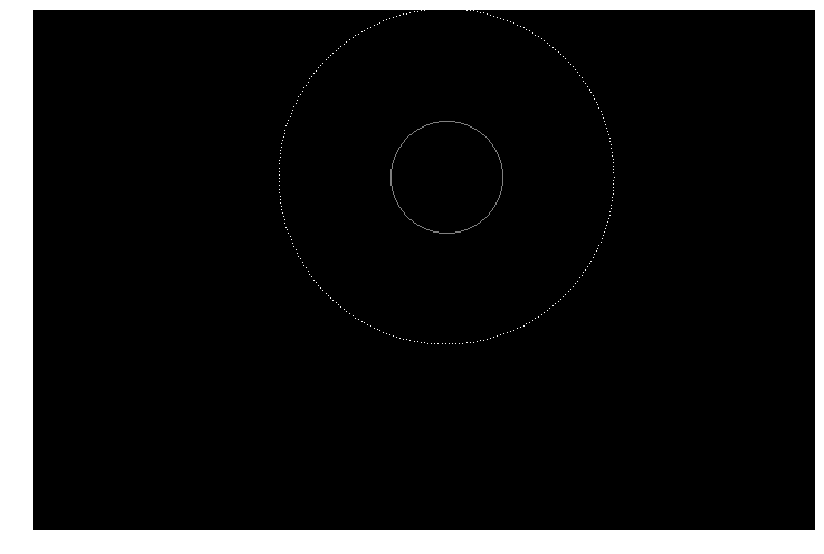

In [38]:
indices = draw.circle_perimeter(150, 370,50)#from here
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

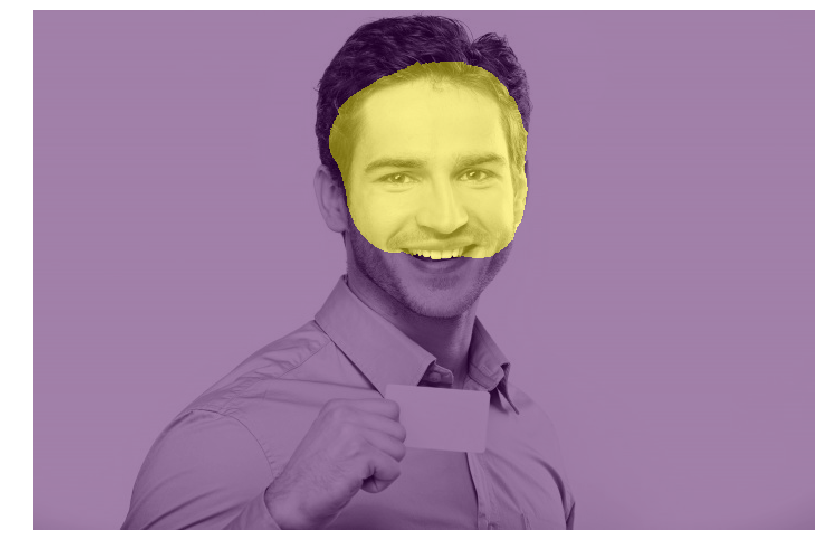

In [39]:
image_segmented = seg.random_walker(image_gray, image_labels)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.5);

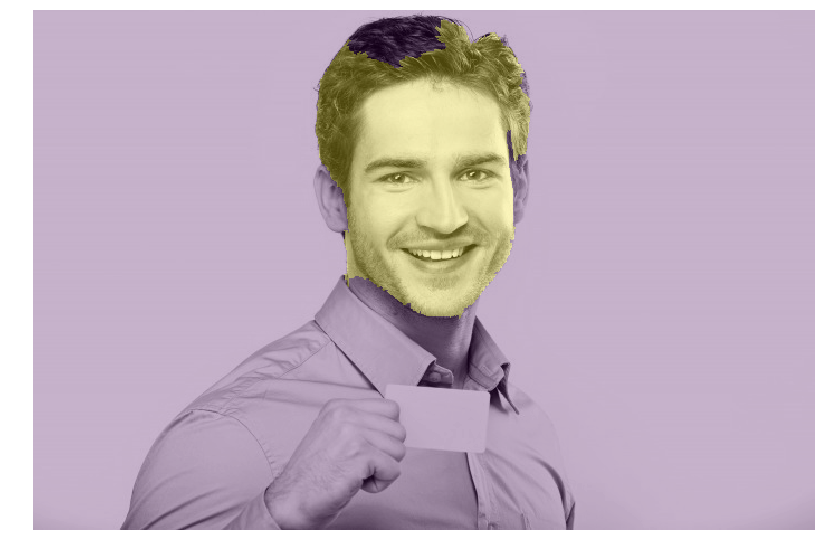

In [40]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);


In [41]:
image_slic = seg.slic(image,n_segments=155)

C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multi

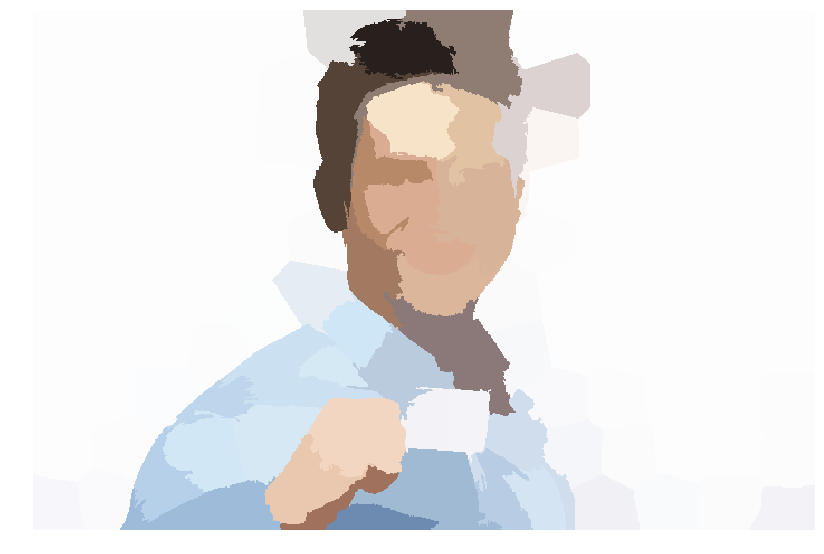

In [42]:
# label2rgb replaces each discrete label with the average interior color
image_show(color.label2rgb(image_slic, image, kind='avg'));

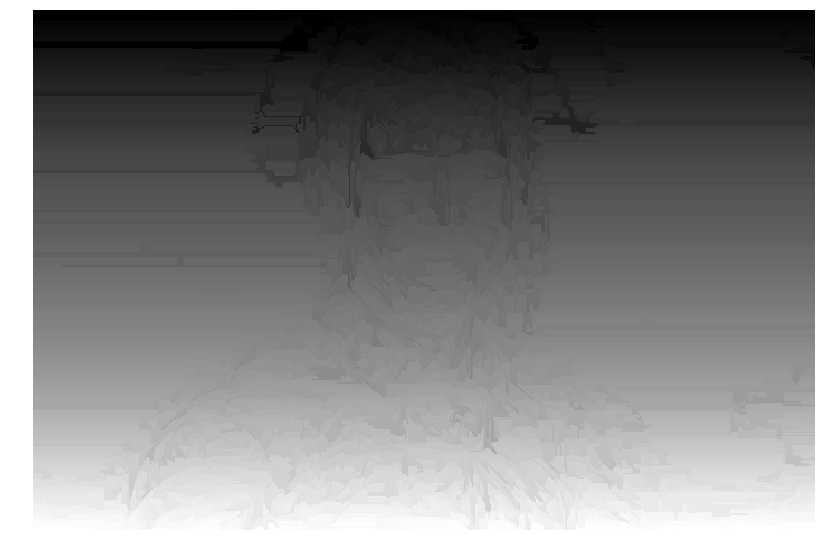

In [43]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb);

In [44]:
np.unique(image_felzenszwalb).size

3074

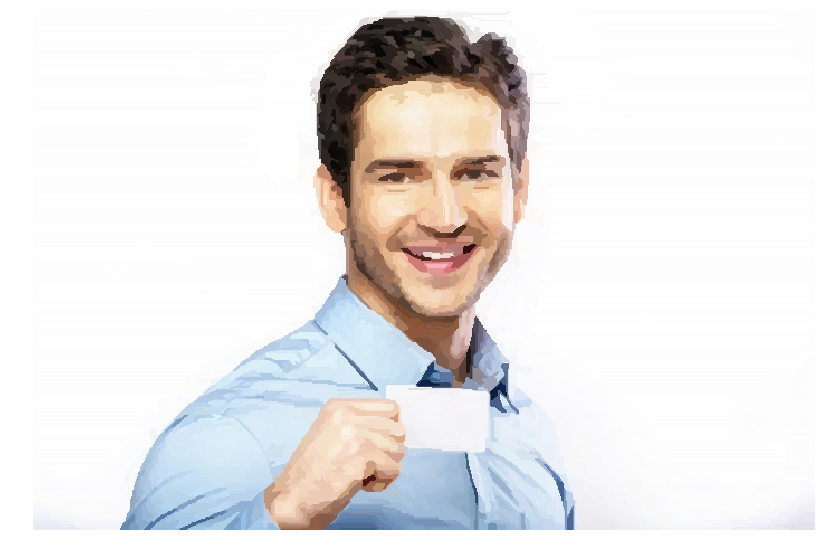

In [45]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);

# 1. Обзор методов сегментации